In [4]:
# pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
# import keras
import tensorflow as tf

# make results reproducible
np.random.seed(28)

In [4]:
# import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("Using GPU: ", gpus)
else:
    print("No GPU found")

Using GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# the mathematical law behind our subject of study
# this is the f(x) in the slides
def world(x):
    return x * np.sin(2*np.pi*x)

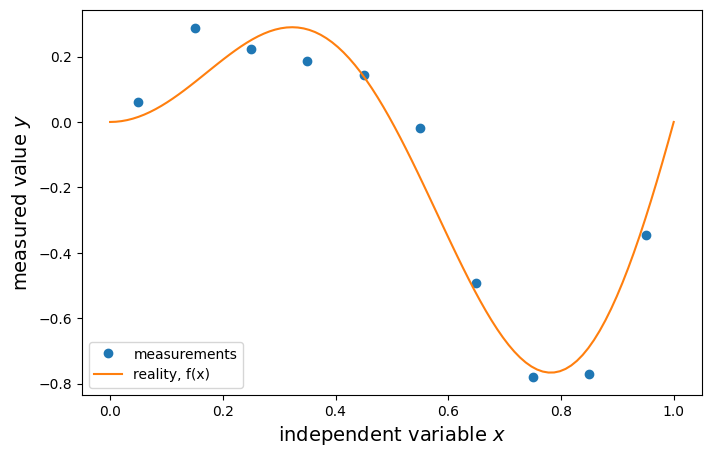

In [6]:
# the number of measurements we have to train our model
N_train = 10

# for these x values we will take measurements
x=np.linspace(0.05,0.95,N_train)

reality = world(x) # unknown to us

# measurements are inherently noisy
sigma =0.1
noise = sigma*np.random.randn(N_train)

# what we actually measure
y= reality + noise

plt.figure(figsize=[8,5])
plt.plot(x,y, "o", label = "measurements")

x_plot = np.linspace(0, 1, 100) # generate points used to plot
plt.plot(x_plot, world(x_plot), label="reality, f(x)")

plt.xlabel('independent variable $x$', size=14)
plt.ylabel('measured value $y$', size=14)
plt.legend(loc='lower left')

plt.show()

# Our first hypothesis is a polynomial of degree three:

$y = h(x, {\bf w}) =  w_0 + w_1 x + w_2 x^2 + w_3 x^3$

to use a linear fit we turn the set of all measurments $\bf x$ into  the design matrix $\bf X$ where columns correspond to powers of $x$.

In [7]:
# convert x into design matrix X 
# This is a trick: we still use linear regression, but by expanding the feature
# vector we have a polynomial model!

degree = 3
poly = PolynomialFeatures(degree)
print(x)
print(x[:,np.newaxis])
X = poly.fit_transform(x[:,np.newaxis]) #np.newaxis adds columns
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)  # do not use scientific notation
print (X)
# x^0    x^1      x^2    x^3

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[[0.05]
 [0.15]
 [0.25]
 [0.35]
 [0.45]
 [0.55]
 [0.65]
 [0.75]
 [0.85]
 [0.95]]
[[1.     0.05   0.0025 0.0001]
 [1.     0.15   0.0225 0.0034]
 [1.     0.25   0.0625 0.0156]
 [1.     0.35   0.1225 0.0429]
 [1.     0.45   0.2025 0.0911]
 [1.     0.55   0.3025 0.1664]
 [1.     0.65   0.4225 0.2746]
 [1.     0.75   0.5625 0.4219]
 [1.     0.85   0.7225 0.6141]
 [1.     0.95   0.9025 0.8574]]


# the actual linear regression

we fit a linear model to all $N_{train}$ dataset indexed by $i$:

$y_i =  w_0 X_{i0} + w_1 X_{i1} + w_2 X_{i2} + w_3 X_{i3}$

where $X_{ij}$ ist the matrix element in the $i$th row and $j$th column.

Additionally, all $X_{i0}$ are equal to 1 so that $w_0$ becomes the offset.

In [8]:
#linear Regression
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [9]:
# show parameter values
print('parameters w_0: {:.3f}'.format(model.intercept_))
for idx in range(3):    
    print('parameters w_{:d}: {:.3f}'.format(idx+1, model.coef_[idx+1]))


parameters w_0: -0.267
parameters w_1: 6.097
parameters w_2: -16.947
parameters w_3: 10.866


In [10]:
# a different way to show the parameter values
print(model.intercept_)
print(model.coef_)    

-0.2671588377832785
[  0.       6.0972 -16.947   10.8662]


[0.     0.0101 0.0202 0.0303 0.0404 0.0505 0.0606 0.0707 0.0808 0.0909
 0.101  0.1111 0.1212 0.1313 0.1414 0.1515 0.1616 0.1717 0.1818 0.1919
 0.202  0.2121 0.2222 0.2323 0.2424 0.2525 0.2626 0.2727 0.2828 0.2929
 0.303  0.3131 0.3232 0.3333 0.3434 0.3535 0.3636 0.3737 0.3838 0.3939
 0.404  0.4141 0.4242 0.4343 0.4444 0.4545 0.4646 0.4747 0.4848 0.4949
 0.5051 0.5152 0.5253 0.5354 0.5455 0.5556 0.5657 0.5758 0.5859 0.596
 0.6061 0.6162 0.6263 0.6364 0.6465 0.6566 0.6667 0.6768 0.6869 0.697
 0.7071 0.7172 0.7273 0.7374 0.7475 0.7576 0.7677 0.7778 0.7879 0.798
 0.8081 0.8182 0.8283 0.8384 0.8485 0.8586 0.8687 0.8788 0.8889 0.899
 0.9091 0.9192 0.9293 0.9394 0.9495 0.9596 0.9697 0.9798 0.9899 1.    ]
[[0.    ]
 [0.0101]
 [0.0202]
 [0.0303]
 [0.0404]
 [0.0505]
 [0.0606]
 [0.0707]
 [0.0808]
 [0.0909]
 [0.101 ]
 [0.1111]
 [0.1212]
 [0.1313]
 [0.1414]
 [0.1515]
 [0.1616]
 [0.1717]
 [0.1818]
 [0.1919]
 [0.202 ]
 [0.2121]
 [0.2222]
 [0.2323]
 [0.2424]
 [0.2525]
 [0.2626]
 [0.2727]
 [0.2828]
 [0

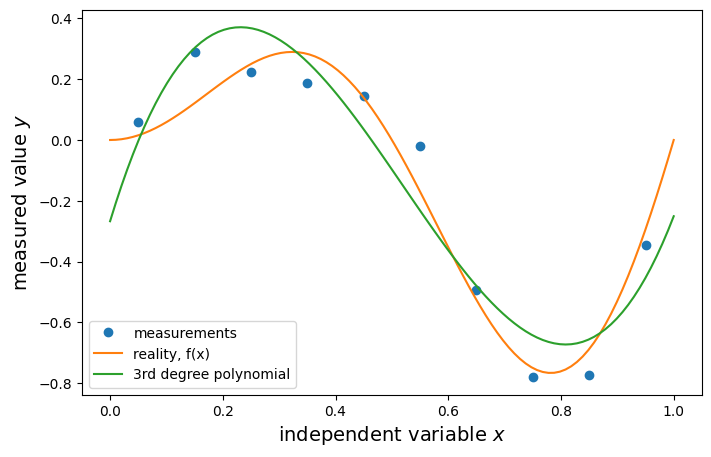

In [12]:
#plot result
plt.figure(figsize=[8,5])
plt.plot(x,y, "o", label = "measurements")
print(x_plot)
print(x_plot[:,np.newaxis])
Xplot=poly.fit_transform(x_plot[:,np.newaxis])
plt.plot(x_plot, world(x_plot), label="reality, f(x)")
plt.plot(x_plot, model.predict(Xplot), label='3rd degree polynomial')
plt.xlabel('independent variable $x$', size=14)
plt.ylabel('measured value $y$', size=14)
plt.legend(loc='lower left')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
print('Mean squared error: %.4f'
      % mean_squared_error(y, model.predict(X)))

Mean squared error: 0.0132


# Changing the order of the polynomial model

The central question in machine learning: is my model flexible enough to capture the reality but not too flexible so that it loses its ability to generalize, i.e. ignore the noise

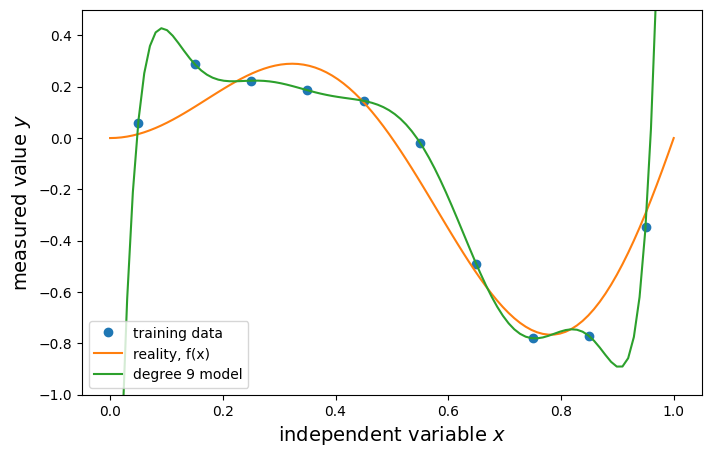

Mean squared error training data: 0.0000


In [14]:
# let's streamline things by creating a pipeline
from sklearn.pipeline import make_pipeline

# here we use a polynomial of degree 9
degree=9

model = make_pipeline(PolynomialFeatures(degree), 
                     linear_model.LinearRegression())
model.fit(x[:, np.newaxis], y); # np.newaxis for preparation of the polynomial 

y_pred = model.predict(x_plot[:, np.newaxis])



#plot result
plt.figure(figsize=[8,5])
plt.plot(x,y, "o", label = "training data")
plt.plot(x_plot, world(x_plot), label="reality, f(x)")
plt.plot(x_plot, y_pred, 
         label="degree %d model" % degree)
plt.ylim(-1,0.5)
plt.xlabel('independent variable $x$', size=14)
plt.ylabel('measured value $y$', size=14)
plt.legend(loc='lower left')
plt.show()

print('Mean squared error training data: %.4f'
      % mean_squared_error(y, model.predict(x[:, np.newaxis])))

In [15]:
# parameter values become really large
print('parameters w_0: {:.3f}'.format(model.steps[1][1].intercept_))
for idx in range(9):    
    print('parameters w_{:d}: {:.3f}'.format(idx+1, model.steps[1][1].coef_[idx+1]))

parameters w_0: -3.129
parameters w_1: 124.757
parameters w_2: -1722.162
parameters w_3: 12329.727
parameters w_4: -51787.240
parameters w_5: 134182.021
parameters w_6: -216461.680
parameters w_7: 211115.778
parameters w_8: -113666.293
parameters w_9: 25892.291


# Introducing test data

the training data are fit perfectly by the ninth order polynomial.
But what happens if we try to predict new datapoints the model has not seen yet?

In [ ]:
# Number of test data
N_test=40

# Generate random grid points (x) in the interval [0,1]:
x_test = np.random.random(N_test)

# make test measurements 
reality = world(x_test)
sigma =0.1
noise = sigma*np.random.randn(N_test)
y_test= reality + noise

# what our model predits for the new test data
y_pred = model.predict(x_test[:, np.newaxis])

plt.figure(figsize=[8,5])
plt.plot(x_test,y_test, "o", label = "test_data");
plt.plot(x_plot, world(x_plot), label="reality")
plt.plot(x_plot, model.predict(x_plot[:, np.newaxis]), 
         label="degree %d model" % degree)
plt.ylim(-1,0.5)
plt.xlabel('independent variable $x$')
plt.ylabel('measured value $y$')
plt.legend(loc='lower left')
plt.show()


print('Mean Square error on test data: %.4f'
      % mean_squared_error(y_test, y_pred))

# coding exercise !
compute test and training MSE for polynomials from grade 0 to 9.

In [ ]:
# variables for saving the values
MSE_test  = np.zeros(10)
MSE_train = np.zeros(10)

#------------- exercise solution starts here ------------------------
degree = range(10)
for d in degree:
    
    
    
    
    print('degree %.0f : MSE training: %.4f, MSE test: %.4f'
      % (d, mse_train, mse_test))

#----------- excercise solution ends here ------------------    
    # save the data for a plot
    MSE_test[d]  = mse_test
    MSE_train[d] = mse_train

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(degree,MSE_train, "o-", label = "MSE train");
plt.plot(degree,MSE_test, "o-", label = "MSE test");
plt.xlim([1,9])
plt.ylim([0,0.1])
plt.xlabel('degree of polynomial', size =14)
plt.ylabel('Mean Square Error', size =14)
plt.legend(loc='upper center')
plt.show()